In [2]:
import pandas as pd

csv_path = r"C:\Users\sagni\Downloads\Flood Detection\archive (1)\modis_flood_features_paling cleaning (1).csv"

# Load CSV
df = pd.read_csv(csv_path)

# Show all column names
print("\nColumn Names:")
for col in df.columns:
    print(f"- {col}")

# Show first few rows to understand data
print("\nFirst 5 Rows:")
print(df.head())

# Show dataset shape
print("\nDataset Shape:", df.shape)



Column Names:
- date
- lon
- lat
- flooded
- jrc_perm_water
- precip_1d
- precip_3d
- NDVI
- NDWI
- landcover
- elevation
- slope
- aspect
- upstream_area
- TWI
- target

First 5 Rows:
         date         lon       lat  flooded  jrc_perm_water  precip_1d  \
0  2003-12-10  120.478677 -6.495942      1.0             1.0   9.645125   
1  2003-12-10  120.480923 -6.495942      1.0             1.0   9.645125   
2  2003-12-10  120.478677 -6.493697      0.0             1.0   9.645125   
3  2003-12-10  120.480923 -6.493697      1.0             0.0   9.645125   
4  2003-12-10  120.478677 -6.491451      0.0             1.0   9.645125   

   precip_3d        NDVI      NDWI  landcover  elevation     slope  \
0  28.935376  6190.93062 -0.051446       17.0        0.0  0.116685   
1  28.935376  6190.93062 -0.051446       17.0        1.0  0.839713   
2  28.935376  6190.93062  0.028399       17.0        0.0  0.466730   
3  28.935376  6190.93062  0.028399       17.0        4.0  0.939179   
4  28.935376 

Dataset Shape: (1025801, 16)
Columns: ['date', 'lon', 'lat', 'flooded', 'jrc_perm_water', 'precip_1d', 'precip_3d', 'NDVI', 'NDWI', 'landcover', 'elevation', 'slope', 'aspect', 'upstream_area', 'TWI', 'target']
Final Accuracy: 1.0000


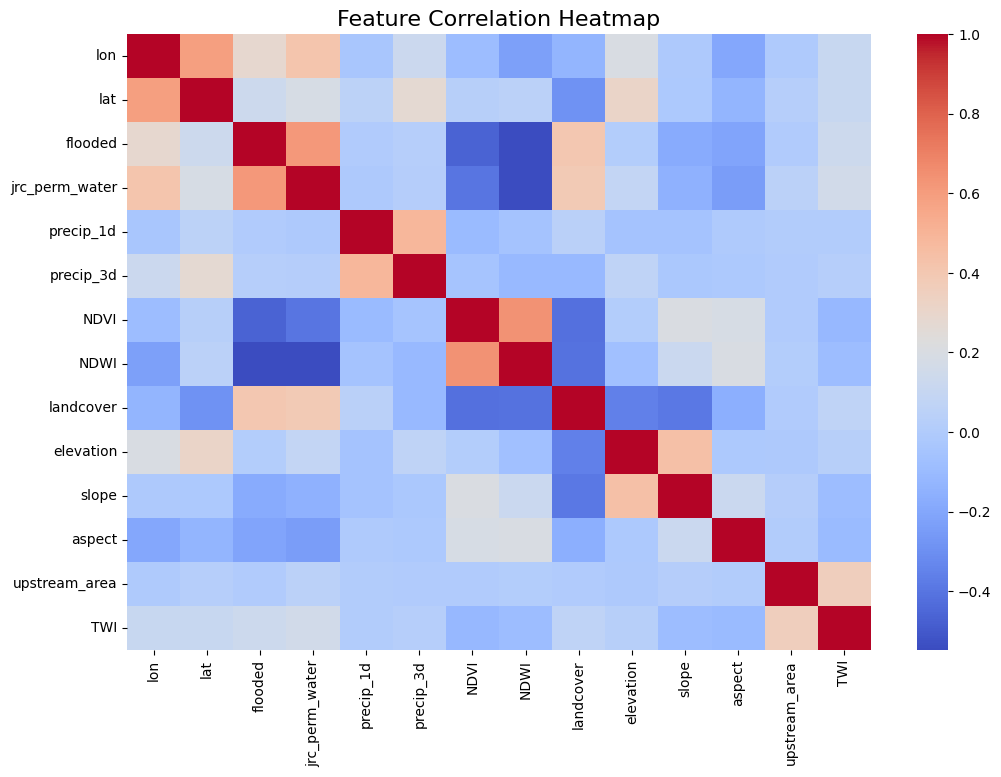

Heatmap saved at: C:\Users\sagni\Downloads\Flood Detection\heatmap.png


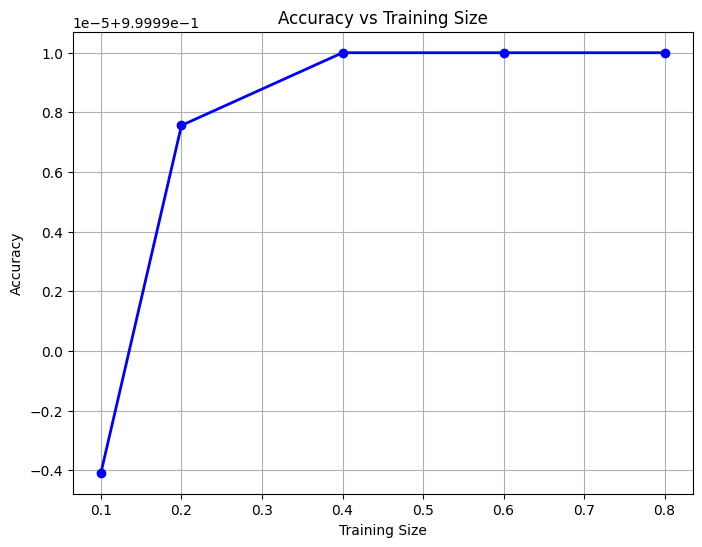

Accuracy graph saved at: C:\Users\sagni\Downloads\Flood Detection\accuracy_graph.png


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# ---------------- Load Dataset ----------------
csv_path = r"C:\Users\sagni\Downloads\Flood Detection\archive (1)\modis_flood_features_paling cleaning (1).csv"
output_dir = r"C:\Users\sagni\Downloads\Flood Detection"

df = pd.read_csv(csv_path)

print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())

# ---------------- Data Preparation ----------------
target_column = "target"  # <-- confirmed target column
X = df.drop(columns=[target_column, "date"])  # Remove date from features
y = df[target_column]

# ---------------- Train-Test Split ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------- Train Model ----------------
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# ---------------- Predictions & Accuracy ----------------
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Accuracy: {accuracy:.4f}")

# ---------------- Heatmap ----------------
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap", fontsize=16)
heatmap_path = os.path.join(output_dir, "heatmap.png")
plt.savefig(heatmap_path, dpi=300)
plt.show()
print(f"Heatmap saved at: {heatmap_path}")

# ---------------- Accuracy Graph ----------------
train_sizes = [0.1, 0.2, 0.4, 0.6, 0.8]
acc_scores = []

for size in train_sizes:
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, train_size=size, random_state=42
    )
    model.fit(X_tr, y_tr)
    y_pred_temp = model.predict(X_te)
    acc_scores.append(accuracy_score(y_te, y_pred_temp))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, acc_scores, marker="o", color="b", linewidth=2)
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Training Size")
plt.grid(True)
accuracy_graph_path = os.path.join(output_dir, "accuracy_graph.png")
plt.savefig(accuracy_graph_path, dpi=300)
plt.show()
print(f"Accuracy graph saved at: {accuracy_graph_path}")
